In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
online = pd.read_csv('Onlinesales_info.csv')
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [3]:
cus = pd.read_csv('Customer_info.csv')
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [4]:
dis = pd.read_csv('Discount_info.csv')
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


# 탐색적 데이터 분석(EDA)

In [6]:
online['제품카테고리'].value_counts()

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [7]:
online['쿠폰상태'].value_counts()

쿠폰상태
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

In [8]:
cus['고객지역'].value_counts()

고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

<Axes: xlabel='고객지역', ylabel='count'>

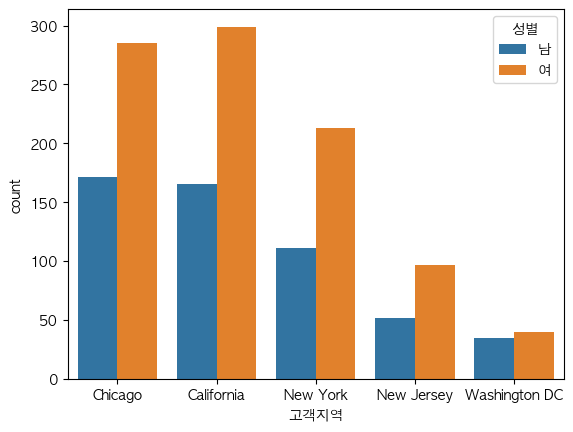

In [9]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

sns.countplot(cus,x='고객지역',hue='성별')
# 모든 지역에서 여성 고객이 더 많음.

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='고객지역', ylabel='Count'>

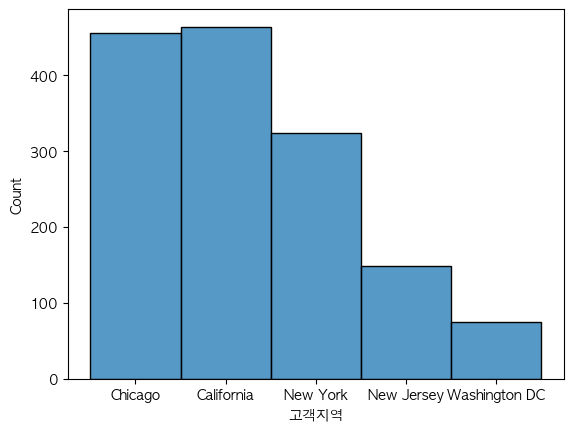

In [10]:
sns.histplot(cus,x='고객지역')

<Axes: xlabel='쿠폰상태', ylabel='count'>

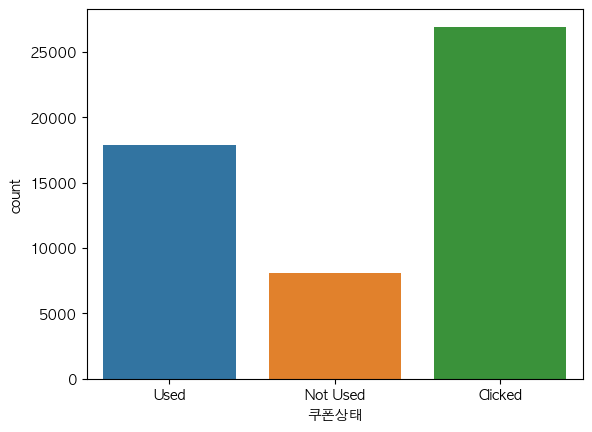

In [11]:
sns.countplot(online,x='쿠폰상태')

# 1. 지도로 folium 시각화, 지역별 카테고리별 구매 수량

In [13]:
online_cus = pd.merge(online, cus, on='고객ID')
online_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   성별      52924 non-null  object 
 10  고객지역    52924 non-null  object 
 11  가입기간    52924 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


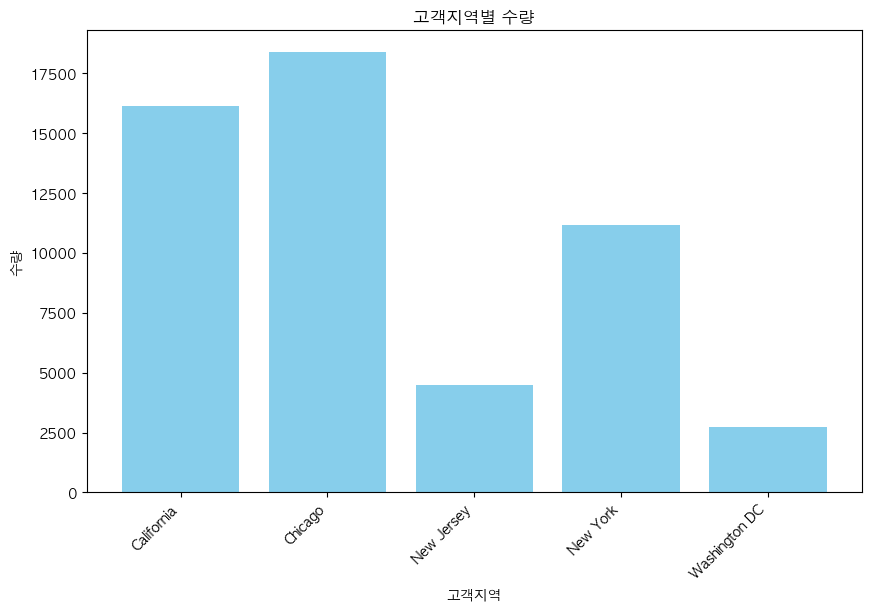

In [14]:
online_cus = online_cus.groupby('고객지역').agg({'수량': 'count','평균금액': 'median','배송료': 'mean'}).reset_index()
online_cus

df = pd.DataFrame(online_cus)

plt.figure(figsize=(10, 6))
plt.bar(df['고객지역'], df['수량'], color='skyblue')
plt.title('고객지역별 수량')
plt.xlabel('고객지역')
plt.ylabel('수량')
plt.xticks(rotation=45, ha='right')


plt.show()
# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC

In [15]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

data = {
    '고객지역': ['California', 'Chicago', 'New Jersey', 'New York', 'Washington DC'],
    '수량': [16136, 18380, 4503, 11173, 2732]
}

df = pd.DataFrame(data)


# 각 고객지역의 위도와 경도 가져오기
geolocator = Nominatim(user_agent="geoapi")

df['location'] = df['고객지역'].apply(geolocator.geocode)


df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 그 지역정보 에서 위도와 경도 정보를 찾아서 튜플 형태로 저장한다.
# 만약 지역정보를 못 찾았다면 None으로 저장



# 미국 중심 좌표
map_center = [37.7749, -122.4194]


customer_region_map = folium.Map(location=map_center, zoom_start=4)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(customer_region_map)

# 각 지역에 마커 추가
for i in range(len(df)):
    if df['point'].iloc[i] is not None:
        folium.Marker(
            location=df['point'].iloc[i][:2],  # 위도와 경도까지만 쓸것
            popup=f"{df['고객지역'].iloc[i]} 수량: {df['수량'].iloc[i]}",
            tooltip=f"{df['고객지역'].iloc[i]}",
        ).add_to(marker_cluster)

# Folium 지도 저장
customer_region_map.save('customer_quantity_map.html')

In [16]:
customer_region_map

# 2. 쿠폰 클릭한 기록은 있으나 사용 X, 결제는 성공

# 4.  구매 날짜 사이의 간격. Frequency랑 연결.

In [18]:
online['거래날짜'] = pd.to_datetime(online['거래날짜'])

# 각 고객의 최소 & 최대 거래날짜
customer_intervals = online.groupby('고객ID')['거래날짜'].agg(['min', 'max'])

# 거래 간격 계산
customer_intervals['거래간격'] = customer_intervals['max'] - customer_intervals['min']
customer_intervals

,min,max,거래간격
고객ID,,,
USER_0000,2019-09-15,2019-09-15,0 days
USER_0001,2019-03-24,2019-11-02,223 days
USER_0002,2019-06-22,2019-10-19,119 days
USER_0003,2019-12-14,2019-12-14,0 days
USER_0004,2019-09-15,2019-09-15,0 days
...,...,...,...
USER_1463,2019-04-05,2019-04-05,0 days
USER_1464,2019-06-22,2019-10-05,105 days
USER_1465,2019-04-05,2019-06-20,76 days


In [19]:
customer_intervals['거래간격'].value_counts()
# 동일한 날에 여러번 구매한 고객이 월등히 많고, 하루 차이로 구매한 고객이 많다.

거래간격
0 days      734
1 days      117
15 days       6
182 days      6
126 days      6
           ... 
325 days      1
315 days      1
188 days      1
81 days       1
105 days      1
Name: count, Length: 284, dtype: int64

In [20]:
online['거래날짜'].value_counts()

거래날짜
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: count, Length: 365, dtype: int64

# 기간별로 등급 groupby
- (12개월 미만 / 12개월 / 24개월 / 36개월 / 48개월 / 50개월)

In [24]:
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [25]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [26]:
online_cus = pd.merge(online, cus, on='고객ID')

In [27]:
def seg(x):
    if x >= 50 :
        return "vip"
    elif x >= 48 : 
        return "diamond"
    elif x >= 36 :
        return "gold"
    elif x >= 24 :
        return "silver"
    elif x >= 12 : 
        return "bronze"
    else :
        return "new"

In [28]:
online_cus['고객등급'] = online_cus['가입기간'].apply(seg)
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new


In [29]:
online_cus['고객등급'].value_counts(normalize=True)

고객등급
silver     0.290851
gold       0.240779
bronze     0.226646
new        0.195204
diamond    0.032594
vip        0.013926
Name: proportion, dtype: float64

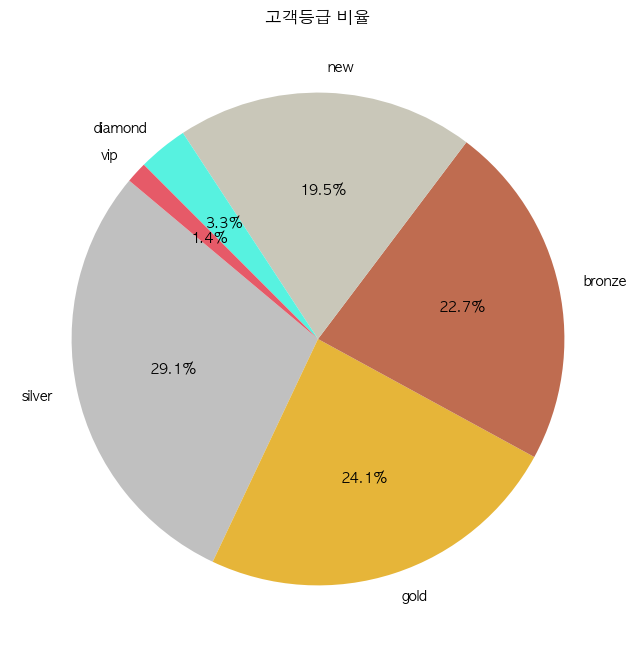

In [30]:
proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['silver', 'gold', 'bronze', 'new', 'diamond', 'vip']


plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.show()

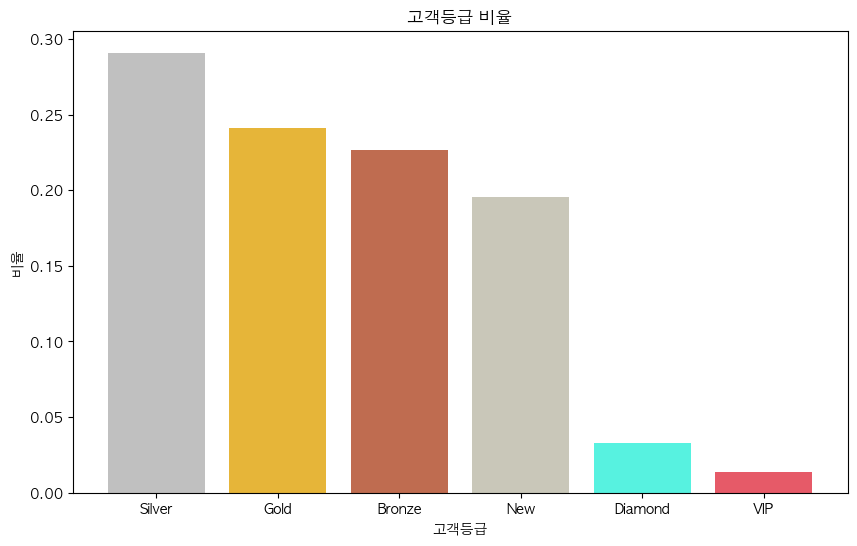

In [31]:
# 주어진 고객등급 비율 데이터
proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['Silver', 'Gold', 'Bronze', 'New', 'Diamond', 'VIP']

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, proportions, color=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.xlabel('고객등급')
plt.ylabel('비율')
plt.title('고객등급 비율')
plt.show()

# silver 등급 : 가입기간이 12 ~ 24 개월 사이인 유저들이 가장 많음.
# new 등급 : 가입기간이 1년 미만인 유저들

# 구매 물품 목록 / 구매 금액별 분류하기 / 지역별로 구매의 잦음 정도 

In [32]:
pd.DataFrame(online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum())

수량
고객지역          제품카테고리                    
California    Accessories            461
              Android                 14
              Apparel               9669
              Backpacks               36
              Bags                  4495
...                                  ...
Washington DC Nest-Canada             30
              Nest-USA              1240
              Notebooks & Journals   250
              Office                4761
              Waze                    53

[100 rows x 1 columns]

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/3951551204.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


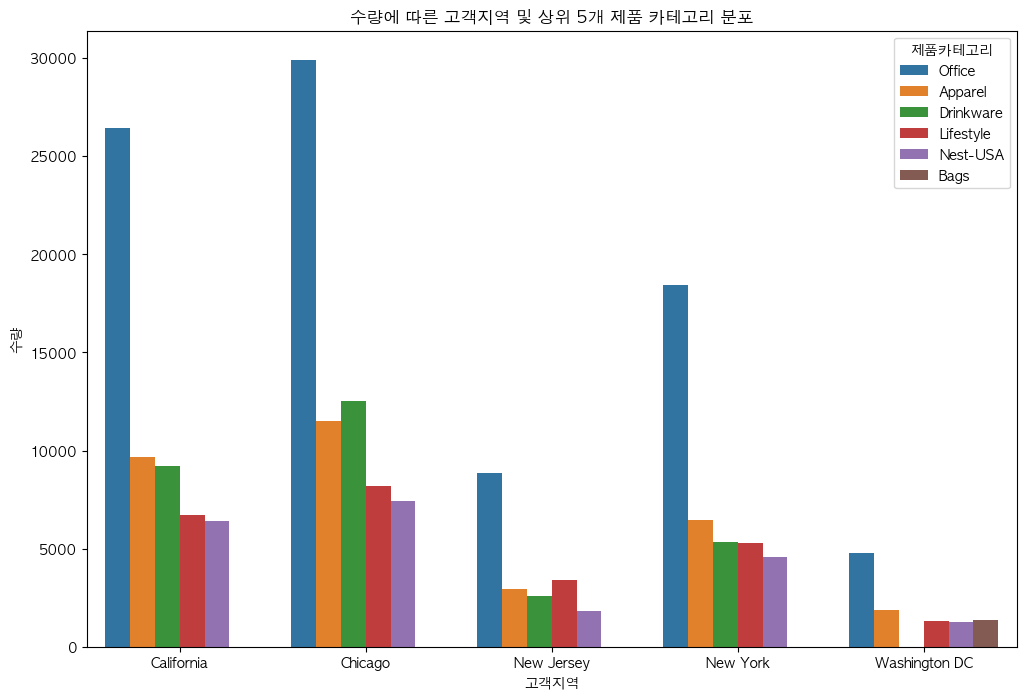

In [33]:
df = online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum().reset_index()

# 수량이 높은 상위 5개 행만 고른다.
# 그룹 키는 결과에서 제외함.
top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='수량', hue='제품카테고리', data=top_categories)


plt.title('수량에 따른 고객지역 및 상위 5개 제품 카테고리 분포')
plt.xlabel('고객지역')
plt.ylabel('수량')


plt.legend(title='제품카테고리')
plt.show()

## 지역별로 많이 판매되는 물품 카테고리 순서
- 시카고 : Office > DrinkWare > Apparel > Lifestyle > Nest-USA
- 캘리포니아 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴욕 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴저지 : Office > Lifestyle > Apparel > DrinkWare > Nest-USA
- 워싱턴 DC : Office > Apparel > Bags >= Lifestyle > Nest-USA

## 지역별 총 구매금액

In [34]:
# 수량과 (제품 ID당) 금액 을 곱하여 구매 금액이라는 컬럼 생성
online_cus['구매금액'] = online_cus['수량'] * online_cus['평균금액']
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new,402.60


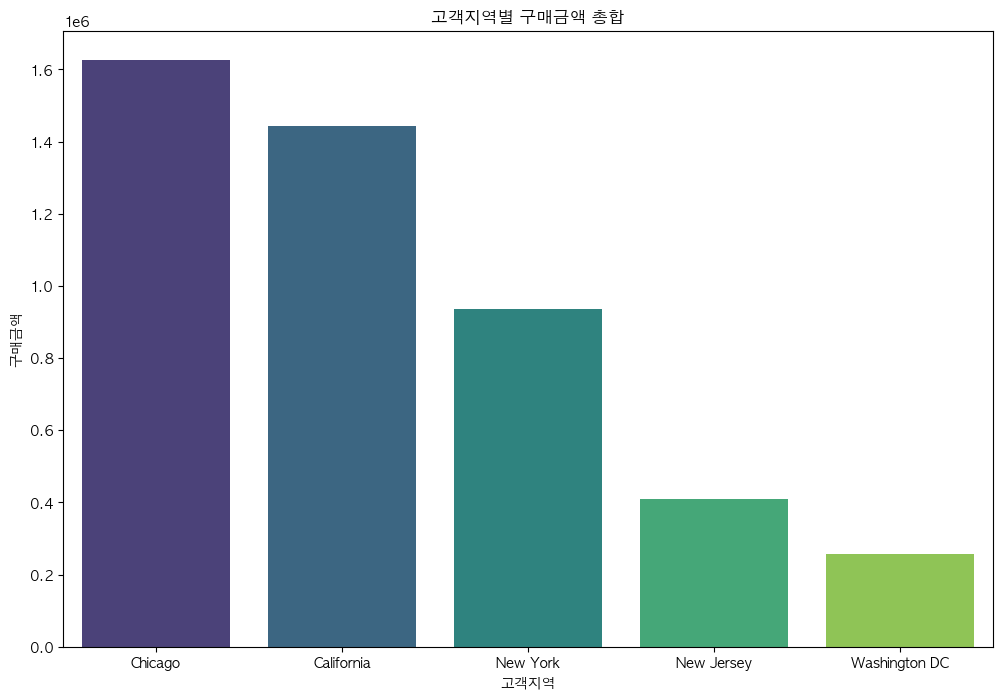

In [35]:
total_pur_region = online_cus.groupby('고객지역')['구매금액'].sum().reset_index()

total_pur_region = total_pur_region.sort_values(by='구매금액', ascending=False)

    
plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', data=total_pur_region, palette='viridis')

plt.title('고객지역별 구매금액 총합')
plt.xlabel('고객지역')
plt.ylabel('구매금액')

plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC"

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/2629474627.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


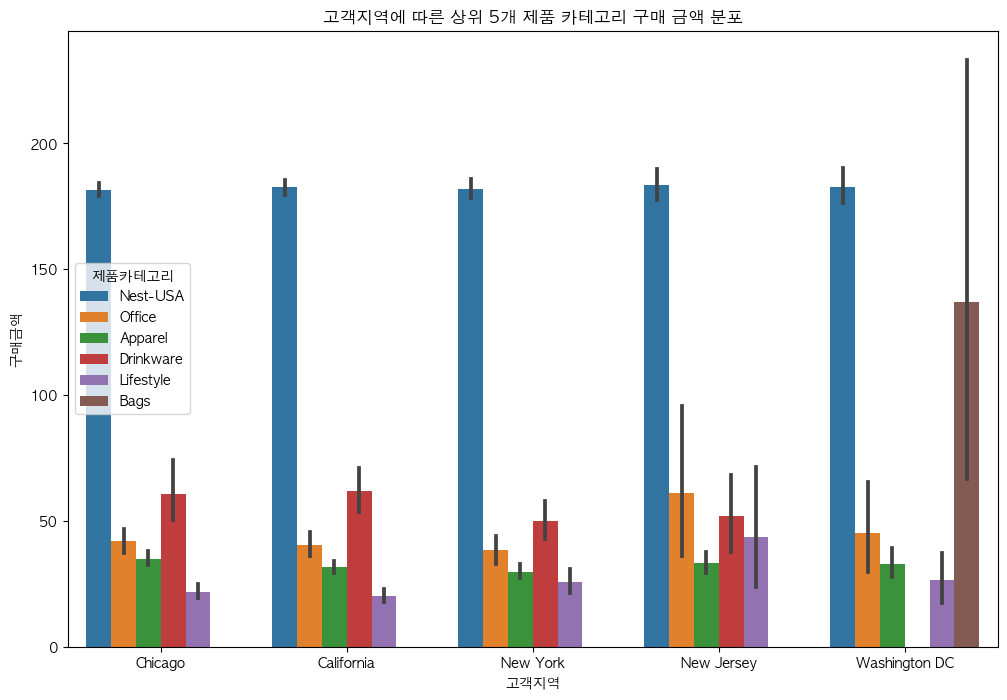

In [36]:
# 각 고객지역에서 수량이 높은 상위 5개 카테고리 선택
top_categories_by_region = online_cus.groupby(['고객지역', '제품카테고리'])['수량'].sum().reset_index()
top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))

selected_data = online_cus.merge(top_categories_by_region[['고객지역', '제품카테고리']], on=['고객지역', '제품카테고리'])


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', hue='제품카테고리', data=selected_data)


plt.title('고객지역에 따른 상위 5개 제품 카테고리 구매 금액 분포')
plt.xlabel('고객지역')
plt.ylabel('구매금액')


plt.legend(title='제품카테고리')

plt.show()

In [37]:
grouped_on_cus = online_cus.groupby(["고객ID", "거래날짜"]).agg('first')

grouped_on_cus = grouped_on_cus.reset_index()
grouped_on_cus['거래날짜'] = pd.to_datetime(grouped_on_cus['거래날짜'])
grouped_on_cus["날짜차이"] = grouped_on_cus["거래날짜"].diff()


result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)
result_on_cus['날짜차이'].apply(lambda x: x.days)
result_on_cus['날짜차이2'] = result_on_cus['날짜차이'].apply(lambda x: x.days)

result_on_cus['날짜차이2'] = result_on_cus['날짜차이2'].astype(int)

result_on_cus['거래날짜'] = pd.to_datetime(result_on_cus['거래날짜'])


result_df = result_on_cus.groupby('고객ID').agg({'날짜차이2': 'mean', '고객지역': 'first'})
result_df

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/2448149036.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)


,날짜차이2,고객지역
고객ID,,
USER_0001,111.5,New York
USER_0002,119.0,California
USER_0006,30.0,New York
USER_0008,139.0,California
USER_0009,24.0,New York
...,...,...
USER_1459,150.5,New York
USER_1460,73.5,Washington DC
USER_1464,52.5,New York


In [38]:
result_df = result_df.groupby('고객지역')['날짜차이2'].mean()
result_df

고객지역
California       64.374860
Chicago          64.100521
New Jersey       79.730714
New York         61.776036
Washington DC    60.659101
Name: 날짜차이2, dtype: float64

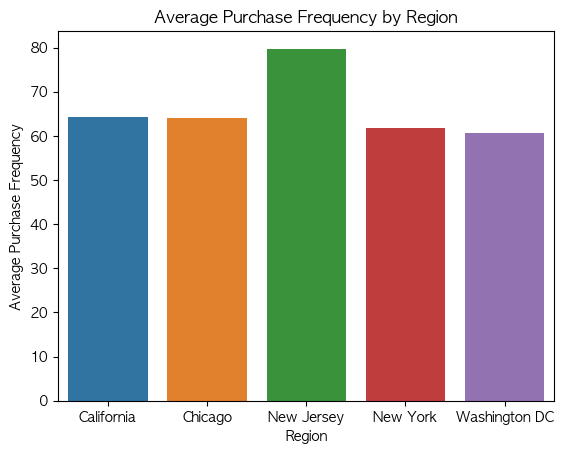

In [39]:
sns.barplot(x=result_df.index, y=result_df.values)
plt.title('Average Purchase Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Purchase Frequency')
plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매 빈번도 순위 : 워싱턴 DC > 뉴욕 > 시카고 > 캘리포니아 > 뉴저지

# 판매 수량과 금액 총합에서 워싱턴 DC가 가장 꼴찌인데, 가장 빈번하게 접속하는 지역은 워싱턴 DC
# 자주 구매한다는 특성을 살려 워싱턴 DC 지역주민들에게 출석체크 이벤트? 쿠폰 발행이나 포인트 적립 .. 

# RFM
- 전체적으로 100~500은 최신성
- 10~50은 빈도
- 1~5는 금전적 가치를 나타냅니다. 
- 가능한 RFM 조합은 125개이며, 여기에 사용된 수치 값은 산업 표준을 따릅니다.

In [40]:
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# Recency

In [42]:
online_cus = pd.merge(online, cus, on='고객ID')
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [43]:
df = pd.DataFrame(online_cus)


df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [44]:
# 고객별로 가장 최근에 구매한 날짜가 언제인가
latest_date = df.groupby('고객ID')['거래날짜'].max().reset_index()
latest_date

,고객ID,거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-11-02
2,USER_0002,2019-10-19
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15
...,...,...
1463,USER_1463,2019-04-05
1464,USER_1464,2019-10-05
1465,USER_1465,2019-06-20
1466,USER_1466,2019-10-23


In [45]:
# 전체 데이터 중 고객이 가장 최근에 구매한 날짜를 max_date라는 변수로 설정
max_date = df['거래날짜'].max()
max_date

Timestamp('2019-12-31 00:00:00')

In [46]:
latest_date['diff_date'] = (max_date - latest_date['거래날짜']).dt.days

recency = latest_date
recency

,고객ID,거래날짜,diff_date
0,USER_0000,2019-09-15,107
1,USER_0001,2019-11-02,59
2,USER_0002,2019-10-19,73
3,USER_0003,2019-12-14,17
4,USER_0004,2019-09-15,107
...,...,...,...
1463,USER_1463,2019-04-05,270
1464,USER_1464,2019-10-05,87
1465,USER_1465,2019-06-20,194
1466,USER_1466,2019-10-23,69


In [47]:
# pd.qcut() 함수로 diff_date를 5등분 해 가장 낮은 구간에 5점에서 가장 높은 구간에 1점까지 점수를 부여하기
recency['R_score'] = pd.qcut(recency['diff_date'], q=5, labels=[5, 4, 3, 2, 1])
recency

,고객ID,거래날짜,diff_date,R_score
0,USER_0000,2019-09-15,107,3
1,USER_0001,2019-11-02,59,4
2,USER_0002,2019-10-19,73,4
3,USER_0003,2019-12-14,17,5
4,USER_0004,2019-09-15,107,3
...,...,...,...,...
1463,USER_1463,2019-04-05,270,1
1464,USER_1464,2019-10-05,87,4
1465,USER_1465,2019-06-20,194,2
1466,USER_1466,2019-10-23,69,4


In [48]:
recency['R_score'].value_counts()

R_score
5    305
1    294
3    293
2    293
4    283
Name: count, dtype: int64

# Frequency

In [50]:
# 고객ID를 기준으로 거래날짜를 nunique() 함수로 집계해 구매 빈도수를 구하기
frequency = df.groupby('고객ID')['거래날짜'].nunique().reset_index()
frequency

,고객ID,거래날짜
0,USER_0000,1
1,USER_0001,3
2,USER_0002,2
3,USER_0003,1
4,USER_0004,1
...,...,...
1463,USER_1463,1
1464,USER_1464,3
1465,USER_1465,2
1466,USER_1466,1


In [51]:
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)
    
frequency['F_score'] = frequency['거래날짜'].apply(parse_values)

frequency

,고객ID,거래날짜,F_score
0,USER_0000,1,1
1,USER_0001,3,3
2,USER_0002,2,2
3,USER_0003,1,1
4,USER_0004,1,1
...,...,...,...
1463,USER_1463,1,1
1464,USER_1464,3,3
1465,USER_1465,2,2
1466,USER_1466,1,1


In [52]:
frequency['F_score'].value_counts()

F_score
1    734
2    364
3    161
5    130
4     79
Name: count, dtype: int64

# Monetary
- 고객이 얼마를 구매했나?

In [53]:
# 고객별로 수량과 평균금액을 곱하여 구매금액 컬럼을 생성
df['구매금액'] = df['수량'] * df['평균금액']
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,402.60


In [54]:
# 고객ID별로 지금까지 구매한 금액의 총합을 묶어 고객별로 얼마나 구매했는지 구하기
monetary = df.groupby('고객ID')['구매금액'].sum().reset_index()
monetary

,고객ID,구매금액
0,USER_0000,30.99
1,USER_0001,13834.90
2,USER_0002,1442.12
3,USER_0003,1360.07
4,USER_0004,1442.47
...,...,...
1463,USER_1463,544.34
1464,USER_1464,2363.05
1465,USER_1465,101.56
1466,USER_1466,298.00


In [55]:
monetary['M_score'] = pd.qcut(monetary['구매금액'], q=5, labels=[1, 2, 3, 4, 5])
monetary

,고객ID,구매금액,M_score
0,USER_0000,30.99,1
1,USER_0001,13834.90,5
2,USER_0002,1442.12,3
3,USER_0003,1360.07,3
4,USER_0004,1442.47,3
...,...,...,...
1463,USER_1463,544.34,2
1464,USER_1464,2363.05,3
1465,USER_1465,101.56,1
1466,USER_1466,298.00,1


In [56]:
monetary.value_counts()

고객ID       구매금액     M_score
USER_0000  30.99    1          1
USER_0986  765.38   2          1
USER_0984  728.72   2          1
USER_0983  6562.08  5          1
USER_0982  1314.52  3          1
                              ..
USER_0487  2823.66  4          1
USER_0486  3213.70  4          1
USER_0485  817.73   2          1
USER_0484  7622.34  5          1
USER_1467  6362.77  5          1
Name: count, Length: 1468, dtype: int64

# RFM 적용하기

In [57]:
print(recency)
print(frequency)
print(monetary)

           고객ID       거래날짜  diff_date R_score
0     USER_0000 2019-09-15        107       3
1     USER_0001 2019-11-02         59       4
2     USER_0002 2019-10-19         73       4
3     USER_0003 2019-12-14         17       5
4     USER_0004 2019-09-15        107       3
...         ...        ...        ...     ...
1463  USER_1463 2019-04-05        270       1
1464  USER_1464 2019-10-05         87       4
1465  USER_1465 2019-06-20        194       2
1466  USER_1466 2019-10-23         69       4
1467  USER_1467 2019-10-10         82       4

[1468 rows x 4 columns]
           고객ID  거래날짜  F_score
0     USER_0000     1        1
1     USER_0001     3        3
2     USER_0002     2        2
3     USER_0003     1        1
4     USER_0004     1        1
...         ...   ...      ...
1463  USER_1463     1        1
1464  USER_1464     3        3
1465  USER_1465     2        2
1466  USER_1466     1        1
1467  USER_1467     2        2

[1468 rows x 3 columns]
           고객ID      구매금액 

In [58]:
# recency, frequency, monetary 데이터프레임 하나로 합치기
rfm_score = recency.merge(frequency, on = '고객ID')
rfm_score = rfm_score.merge(monetary, on = '고객ID')
rfm_score

,고객ID,거래날짜_x,diff_date,R_score,거래날짜_y,F_score,구매금액,M_score
0,USER_0000,2019-09-15,107,3,1,1,30.99,1
1,USER_0001,2019-11-02,59,4,3,3,13834.90,5
2,USER_0002,2019-10-19,73,4,2,2,1442.12,3
3,USER_0003,2019-12-14,17,5,1,1,1360.07,3
4,USER_0004,2019-09-15,107,3,1,1,1442.47,3
...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,1,1,1,544.34,2
1464,USER_1464,2019-10-05,87,4,3,3,2363.05,3
1465,USER_1465,2019-06-20,194,2,2,2,101.56,1
1466,USER_1466,2019-10-23,69,4,1,1,298.00,1


In [59]:
# rfm_score을 합치기 위해 string으로 형 변환
rfm_score['R_score'] = rfm_score['R_score'].astype(str)
rfm_score['F_score'] = rfm_score['F_score'].astype(str)
rfm_score['M_score'] = rfm_score['M_score'].astype(str)

# rfm_score 합치기
rfm_score['rfm_score'] = rfm_score['R_score'] + rfm_score['F_score'] + rfm_score['M_score']
rfm_score

,고객ID,거래날짜_x,diff_date,R_score,거래날짜_y,F_score,구매금액,M_score,rfm_score
0,USER_0000,2019-09-15,107,3,1,1,30.99,1,311
1,USER_0001,2019-11-02,59,4,3,3,13834.90,5,435
2,USER_0002,2019-10-19,73,4,2,2,1442.12,3,423
3,USER_0003,2019-12-14,17,5,1,1,1360.07,3,513
4,USER_0004,2019-09-15,107,3,1,1,1442.47,3,313
...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,1,1,1,544.34,2,112
1464,USER_1464,2019-10-05,87,4,3,3,2363.05,3,433
1465,USER_1465,2019-06-20,194,2,2,2,101.56,1,221
1466,USER_1466,2019-10-23,69,4,1,1,298.00,1,411


In [61]:
rfm_score[['R_score', 'F_score', 'M_score']] = rfm_score[['R_score', 'F_score', 'M_score']].astype(float)

# rfm_score 데이터프레임에 새로운 컬럼 'rfm_calculated' 추가
rfm_score['rfm_calculated'] = ((0.3 * rfm_score['R_score']) + (0.2 * rfm_score['F_score']) + (0.5 * rfm_score['M_score'])) / 5 * 100

In [62]:
rfm_score

,고객ID,거래날짜_x,diff_date,R_score,거래날짜_y,F_score,구매금액,M_score,rfm_score,rfm_calculated
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0
1,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0
2,USER_0002,2019-10-19,73,4.0,2,2.0,1442.12,3.0,423,62.0
3,USER_0003,2019-12-14,17,5.0,1,1.0,1360.07,3.0,513,64.0
4,USER_0004,2019-09-15,107,3.0,1,1.0,1442.47,3.0,313,52.0
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,1.0,1,1.0,544.34,2.0,112,30.0
1464,USER_1464,2019-10-05,87,4.0,3,3.0,2363.05,3.0,433,66.0
1465,USER_1465,2019-06-20,194,2.0,2,2.0,101.56,1.0,221,30.0
1466,USER_1466,2019-10-23,69,4.0,1,1.0,298.00,1.0,411,38.0


In [63]:
rfm_score['rfm_grade'] = pd.qcut(rfm_score['rfm_calculated'], q=5, labels=['Beginner','Bronze','Silver','Gold','VIP'], precision=0)
rfm_score

,고객ID,거래날짜_x,diff_date,R_score,거래날짜_y,F_score,구매금액,M_score,rfm_score,rfm_calculated,rfm_grade
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,Beginner
1,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,VIP
2,USER_0002,2019-10-19,73,4.0,2,2.0,1442.12,3.0,423,62.0,Gold
3,USER_0003,2019-12-14,17,5.0,1,1.0,1360.07,3.0,513,64.0,Gold
4,USER_0004,2019-09-15,107,3.0,1,1.0,1442.47,3.0,313,52.0,Silver
...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,1.0,1,1.0,544.34,2.0,112,30.0,Beginner
1464,USER_1464,2019-10-05,87,4.0,3,3.0,2363.05,3.0,433,66.0,Gold
1465,USER_1465,2019-06-20,194,2.0,2,2.0,101.56,1.0,221,30.0,Beginner
1466,USER_1466,2019-10-23,69,4.0,1,1.0,298.00,1.0,411,38.0,Bronze


In [64]:
rfm_score = rfm_score.rename(columns={'거래날짜_x': '거래날짜','거래날짜_y':'거래횟수'})
rfm_score

,고객ID,거래날짜,diff_date,R_score,거래횟수,F_score,구매금액,M_score,rfm_score,rfm_calculated,rfm_grade
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,Beginner
1,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,VIP
2,USER_0002,2019-10-19,73,4.0,2,2.0,1442.12,3.0,423,62.0,Gold
3,USER_0003,2019-12-14,17,5.0,1,1.0,1360.07,3.0,513,64.0,Gold
4,USER_0004,2019-09-15,107,3.0,1,1.0,1442.47,3.0,313,52.0,Silver
...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,1.0,1,1.0,544.34,2.0,112,30.0,Beginner
1464,USER_1464,2019-10-05,87,4.0,3,3.0,2363.05,3.0,433,66.0,Gold
1465,USER_1465,2019-06-20,194,2.0,2,2.0,101.56,1.0,221,30.0,Beginner
1466,USER_1466,2019-10-23,69,4.0,1,1.0,298.00,1.0,411,38.0,Bronze


In [65]:
merged_df = pd.merge(rfm_score, online, on='고객ID', how='inner')
merged_df

,고객ID,거래날짜_x,diff_date,R_score,거래횟수,F_score,구매금액,M_score,rfm_score,rfm_calculated,rfm_grade,거래ID,거래날짜_y,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,Beginner,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used
1,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,Beginner,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used
2,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,VIP,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked
3,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,VIP,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used
4,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,VIP,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,VIP,Transaction_18636,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used
52920,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,VIP,Transaction_18637,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used
52921,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,VIP,Transaction_18637,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used
52922,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,VIP,Transaction_18638,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked


In [66]:
merged_df = pd.merge(merged_df, cus, on='고객ID', how='inner')
merged_df

,고객ID,거래날짜_x,diff_date,R_score,거래횟수,F_score,구매금액,M_score,rfm_score,rfm_calculated,...,거래날짜_y,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,여,New York,31
1,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,여,New York,31
2,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,...,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,남,New York,20
3,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,...,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,남,New York,20
4,USER_0001,2019-11-02,59,4.0,3,3.0,13834.90,5.0,435,86.0,...,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,남,New York,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used,여,New Jersey,36
52920,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used,여,New Jersey,36
52921,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used,여,New Jersey,36
52922,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked,여,New Jersey,36


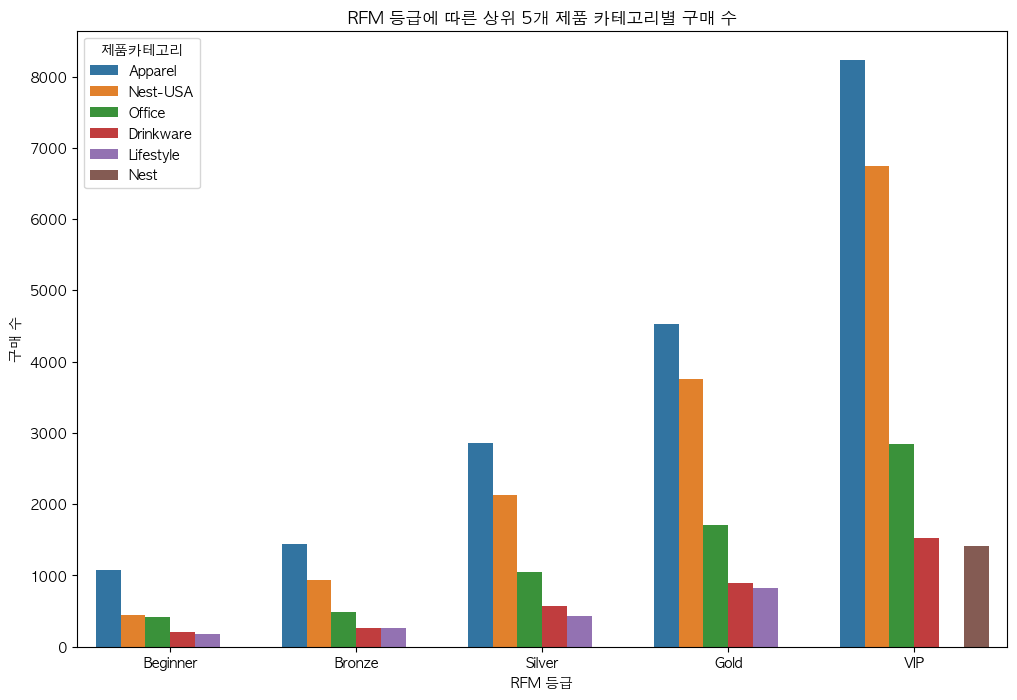

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories_df = merged_df.groupby(['rfm_grade', '제품카테고리']).size().reset_index(name='구매 수')
top_categories_df = top_categories_df.sort_values(by=['rfm_grade', '구매 수'], ascending=[True, False])
top_categories_df = top_categories_df.groupby('rfm_grade').head(5)


plt.figure(figsize=(12, 8))
sns.barplot(x='rfm_grade', y='구매 수', hue='제품카테고리', data=top_categories_df)
plt.title('RFM 등급에 따른 상위 5개 제품 카테고리별 구매 수')
plt.xlabel('RFM 등급')
plt.ylabel('구매 수')
plt.show()

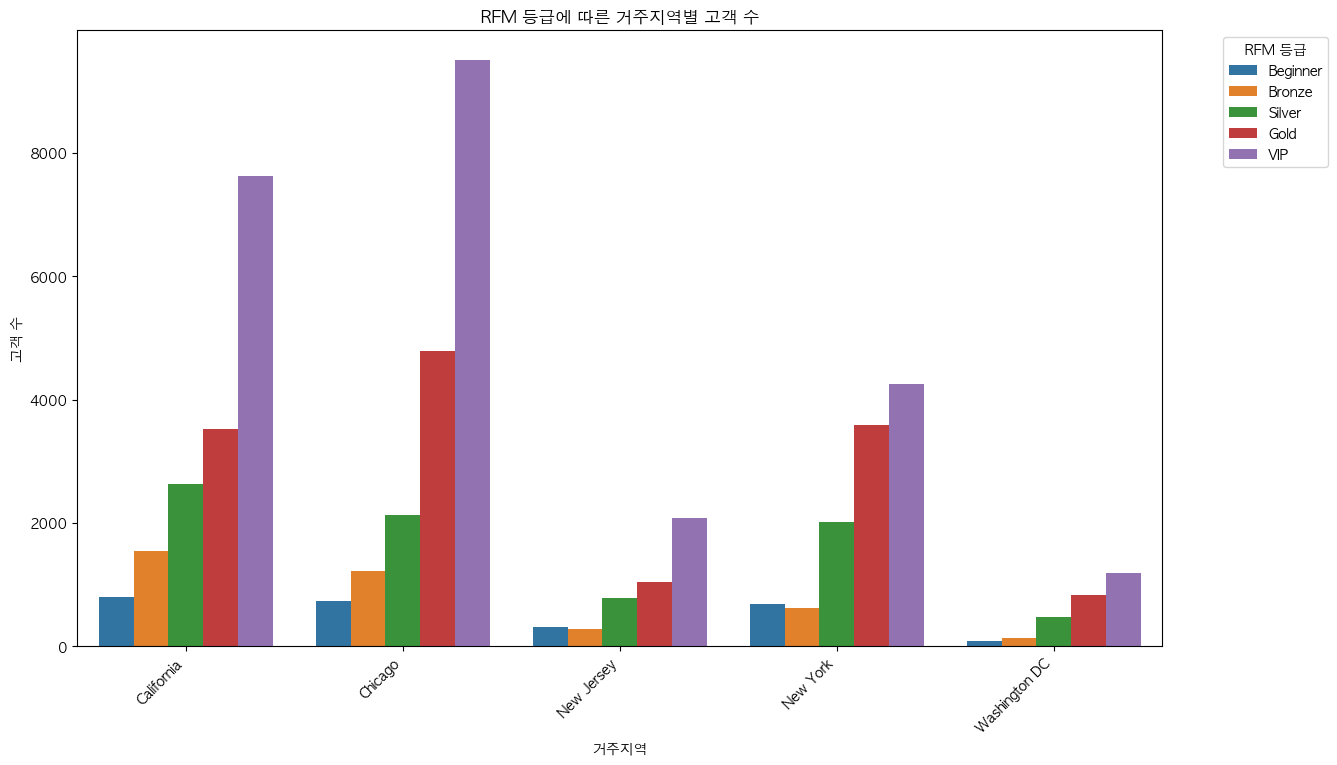

In [68]:
rfm_location_df = merged_df.groupby(['rfm_grade', '고객지역']).size().reset_index(name='고객 수')


plt.figure(figsize=(14, 8))
sns.barplot(x='고객지역', y='고객 수', hue='rfm_grade', data=rfm_location_df)
plt.title('RFM 등급에 따른 거주지역별 고객 수')
plt.xlabel('거주지역')
plt.ylabel('고객 수')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.legend(title='RFM 등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

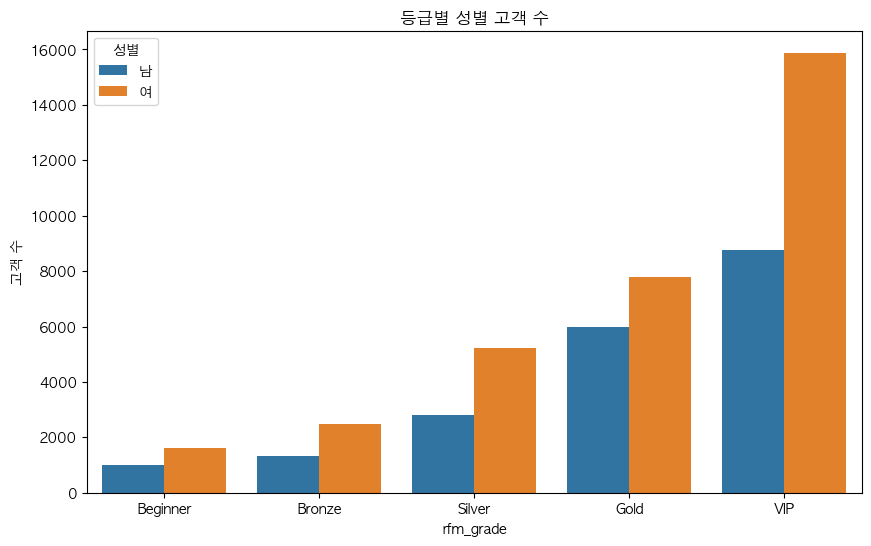

In [69]:
# 성별에 따른 등급별 고객 수
gender_grade_counts = merged_df.groupby(['rfm_grade', '성별']).size().reset_index(name='고객 수')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='rfm_grade', y='고객 수', hue='성별', data=gender_grade_counts)
plt.title('등급별 성별 고객 수')
plt.show()

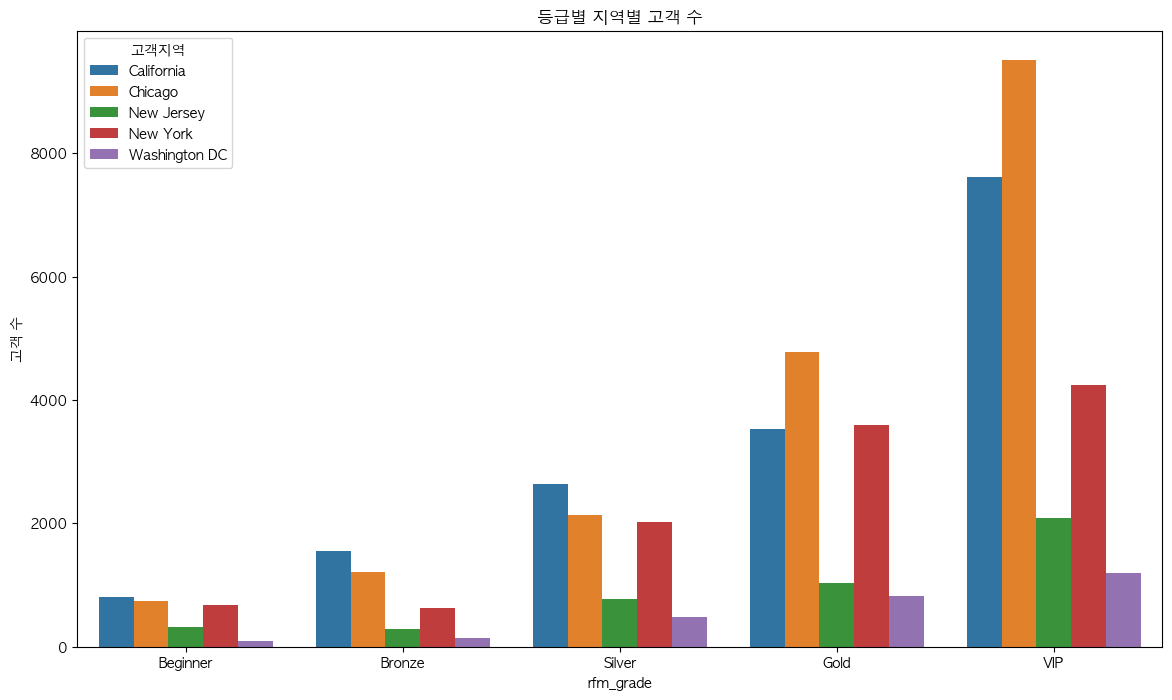

In [70]:
grade_region_counts = merged_df.groupby(['rfm_grade', '고객지역']).size().reset_index(name='고객 수')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='rfm_grade', y='고객 수', hue='고객지역', data=grade_region_counts)
plt.title('등급별 지역별 고객 수')
plt.show()

In [71]:
merged_df = pd.merge(merged_df, dis, on='제품카테고리', how='inner')
merged_df

,고객ID,거래날짜_x,diff_date,R_score,거래횟수,F_score,구매금액,M_score,rfm_score,rfm_calculated,...,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
0,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,1,19.99,75.00,Used,여,New York,31,Jan,SALE10,10
1,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,1,19.99,75.00,Used,여,New York,31,Feb,SALE20,20
2,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,1,19.99,75.00,Used,여,New York,31,Mar,SALE30,30
3,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,1,19.99,75.00,Used,여,New York,31,Apr,SALE10,10
4,USER_0000,2019-09-15,107,3.0,1,1.0,30.99,1.0,311,32.0,...,1,19.99,75.00,Used,여,New York,31,May,SALE20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,1,4.80,26.43,Clicked,여,New Jersey,36,Aug,SALE20,20
630284,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,1,4.80,26.43,Clicked,여,New Jersey,36,Sep,SALE30,30
630285,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,1,4.80,26.43,Clicked,여,New Jersey,36,Oct,SALE10,10
630286,USER_1467,2019-10-10,82,4.0,2,2.0,6362.77,5.0,425,82.0,...,1,4.80,26.43,Clicked,여,New Jersey,36,Nov,SALE20,20


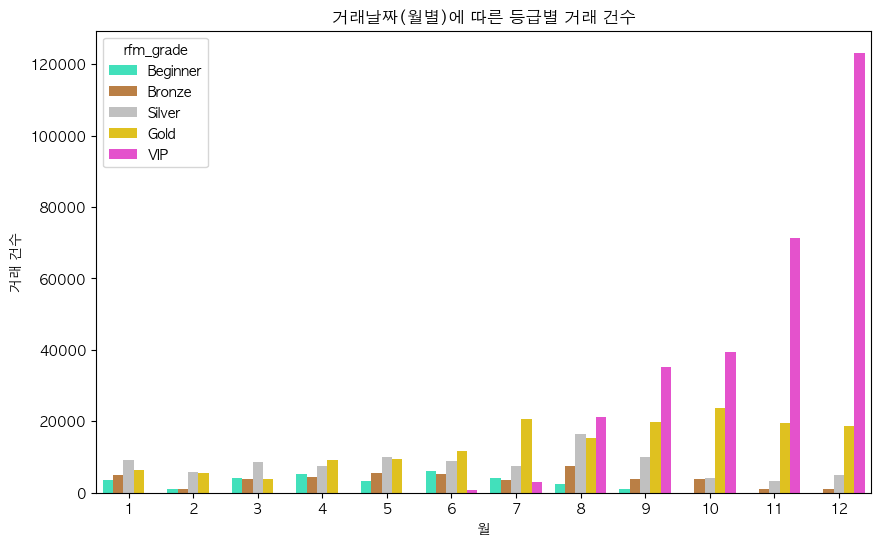

In [75]:
merged_df['거래날짜_x'] = pd.to_datetime(merged_df['거래날짜_x'])
merged_df['월'] = merged_df['거래날짜_x'].dt.month

# 등급별 월별 거래 건수(count) 계산
result = merged_df.groupby(['월', 'rfm_grade']).size().reset_index(name='거래건수')

grade_palette = {'Beginner': '#28fac9', 'VIP': '#fc3adc', 'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'}

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='월', y='거래건수', hue='rfm_grade', data=result, palette=grade_palette)
plt.title('거래날짜(월별)에 따른 등급별 거래 건수')
plt.xlabel('월')
plt.ylabel('거래 건수')
plt.show()